# Prototyping a Data Filtering Pipeline
## Prerequisites

In [1]:
import glob
import pandas as pd
import mmproteo
import matplotlib.pyplot as plt
import re

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kk30c49p because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

## Data Import

In [3]:
pwd

'/tf/workspace/notebooks'

In [4]:
PROJECT = "PXD010000"
DATA_PATH = f"../datasets/{PROJECT}"
DUMP_PATH = f"../dumps/{PROJECT}"
TRAINING_COLUMNS_DUMP_PATH = DUMP_PATH + "/training_columns"
MZMLID_FILES_PATH = f"{DATA_PATH}/*_mzmlid.parquet"

In [5]:
mmproteo.utils.utils.ensure_dir_exists(TRAINING_COLUMNS_DUMP_PATH)

In [6]:
MZMLID_FILE_PATHS = glob.glob(MZMLID_FILES_PATH)
MZMLID_FILE_PATHS

['../datasets/PXD010000/Biodiversity_B_fragilis_01_28Jul15_Arwen_14-12-03_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_anaerobic_03_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_aerobic_01_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_anaerobic_02_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_anaerobic_01_08Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_aerobic_02_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_fragilis_LIB_aerobic_03_01Feb16_Arwen_15-07-13_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_tumefaciens_R2A_aerobic_1_23Nov16_Pippin_16-09-11_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_ATCC14579_LB_aerobic_2_17Ju

In [7]:
ls ../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06*

../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06.mzML
../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06_msgfplus.mzid


In [8]:
len(MZMLID_FILE_PATHS)

40

In [9]:
# for testing
MZMLID_FILE_PATHS = MZMLID_FILE_PATHS[:1]

In [10]:
current_input_file_path = MZMLID_FILE_PATHS[0]

In [11]:
df = pd.read_parquet(current_input_file_path)

## Data Description

In [12]:
df.drop(columns=['mz_array', 'intensity_array']).head()

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,scanList__count,scanList__no_combination,scanList__scan__0__scan_start_time,scanList__scan__0__filter_string,scanList__scan__0__preset_scan_configuration,scanList__scan__0__ion_injection_time,scanList__scan__0__scanWindowList__count,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_lower_limit,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_upper_limit,MSn_spectrum,precursorList__count,scanList__scan__0__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__0__spectrumRef,precursorList__precursor__0__isolationWindow__isolation_window_target_mz,precursorList__precursor__0__isolationWindow__isolation_window_lower_offset,precursorList__precursor__0__isolationWindow__isolation_window_upper_offset,precursorList__precursor__0__selectedIonList__count,precursorList__precursor__0__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__0__activation__collision_energy,precursorList__precursor__0__selectedIonList__selectedIon__0__selected_ion_mz,precursorList__precursor__0__selectedIonList__selectedIon__0__charge_state,precursorList__precursor__0__selectedIonList__selectedIon__0__peak_intensity,mzml_filename,spectrumID,scan_numbers,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__FileFormat,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__DatabaseName__ID_005334_236ED22Cfasta,SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__Modification__0__name,SpectrumIdentificationItem__1__P

In [13]:
df.dtypes

index                                                                                             int64
id                                                                                               object
defaultArrayLength                                                                                int64
MS1_spectrum                                                                                     object
ms_level                                                                                          int64
positive_scan                                                                                    object
centroid_spectrum                                                                                object
base_peak_mz                                                                                    float64
base_peak_intensity                                                                             float64
total_ion_current                                               

In [14]:
df.describe()

,index,defaultArrayLength,ms_level,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,scanList__count,scanList__scan__0__scan_start_time,scanList__scan__0__preset_scan_configuration,scanList__scan__0__ion_injection_time,scanList__scan__0__scanWindowList__count,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_lower_limit,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_upper_limit,precursorList__count,scanList__scan__0__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__0__isolationWindow__isolation_window_target_mz,precursorList__precursor__0__isolationWindow__isolation_window_lower_offset,precursorList__precursor__0__isolationWindow__isolation_window_upper_offset,precursorList__precursor__0__selectedIonList__count,precursorList__precursor__0__activation__collision_energy,precursorList__precursor__0__selectedIonList__selectedIon__0__selected_ion_mz,precursorList__precursor__0__selectedIonList__selectedIon__0__charge_state,precursorList__precursor__0__selectedIonList__selectedIon__0__peak_intensity,scan_numbers,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__numDatabaseSequences,SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__location,SpectrumIdentificationItem__1__Modification__1__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__1__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__location,SpectrumIdentificationItem__2__rank,SpectrumIdentificationItem__2__calculatedMassToCharge,SpectrumIdentificationItem__2__experimentalMassToCharge,SpectrumIdentificationItem__2__chargeState,SpectrumIdentificationItem__2__MSGFRawScore,SpectrumIdentificationItem__2__MSGFDeNovoScore,SpectrumIdentificationItem__2__MSGFSpecEValue,SpectrumIdentificationItem__2__MSGFEValue,SpectrumIdentificationItem__2__MSGFQValue,SpectrumIdentificationItem__2__MSGFPepQValue,SpectrumIdentificationItem__2__IsotopeError,SpectrumIdentificationItem__2__ExplainedIonCurrentRatio,SpectrumIdentificationItem__2__NTermIonCurrentRatio,SpectrumIdentificationItem__2__CTermIonCurrentRatio,SpectrumIdentificationItem__2__MS2IonCurrent,SpectrumIdentificationItem__2__NumMatchedMainIons,SpectrumIdentificationItem__2__MeanErrorAll,SpectrumIdentificationItem__2__StdevErrorAll,SpectrumIdentificationItem__2__MeanErrorTop7,SpectrumIdentificationIt

### Drop 2nd+ Matches

In [15]:
column_patterns_to_drop = [
    "SpectrumIdentificationItem__(?!1__)",
    "SpectrumIdentificationItem__1__PeptideEvidenceRef__(?!0__)"  # they seem to be filled with NaN and None anyway
]

In [16]:
df2 = df
for column_pattern in column_patterns_to_drop:
    re_pattern = re.compile(column_pattern)
    columns_to_drop = [col for col in df2.columns if re_pattern.match(col) is not None]
    df2 = df2.drop(columns=columns_to_drop)

In [17]:
df2.head(2).T.dropna().sort_index()

,0,1
FileFormat,mzML file,mzML file
MSn_spectrum,,
SpectrumIDFormat,Thermo nativeID format,Thermo nativeID format
SpectrumIdentificationItem__1__AssumedDissociationMethod,HCD,HCD
SpectrumIdentificationItem__1__CTermIonCurrentRatio,0.120865,0.0217437
SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,0.175325,0.249008
SpectrumIdentificationItem__1__IsotopeError,0,1
SpectrumIdentificationItem__1__MS2IonCurrent,1.22803e+06,1.09345e+06
SpectrumIdentificationItem__1__MSGFDeNovoScore,97,144
SpectrumIdentificationItem__1__MSGFEValue,1.23505e-06,7.20949


In [18]:
df = df2

### Plot isDecoy by Raw Score

In [19]:
IS_DECOY = 'SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy'

In [20]:
RAW_SCORE = 'SpectrumIdentificationItem__1__MSGFRawScore'

In [21]:
def plot_values_by_class(df, value_col, class_col):
    df.pivot(columns=class_col, values=value_col).plot.hist(bins=100, alpha=0.5)
    plt.xlabel(value_col)
    plt.show()

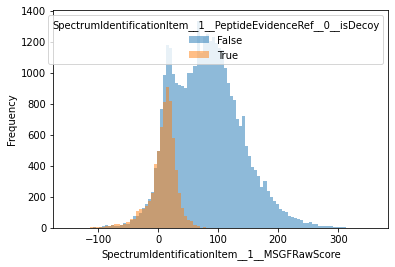

In [22]:
plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY)

### Weird Findings: There are NA values in the first isDecoy column

In [23]:
df[IS_DECOY].dropna().value_counts() == df[IS_DECOY].value_counts()

False    True
True     True
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy, dtype: bool

In [24]:
df[IS_DECOY].fillna(value=-1).value_counts()

False    34781
True      6817
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy, dtype: int64

In [25]:
df[df[IS_DECOY].fillna(value=-1) == -1].head(1).T

""
index
id
defaultArrayLength
MS1_spectrum
ms_level
positive_scan
centroid_spectrum
base_peak_mz
base_peak_intensity
total_ion_current


In [26]:
df[IS_DECOY].value_counts()

False    34781
True      6817
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy, dtype: int64

## Data Filtering

### Drop NA Decoys

In [27]:
df = df.dropna(subset=[IS_DECOY])

### FDR Filtering and Decoy Removal 

In [28]:
FDR_COLUMN = 'SpectrumIdentificationItem__1__MSGFQValue'

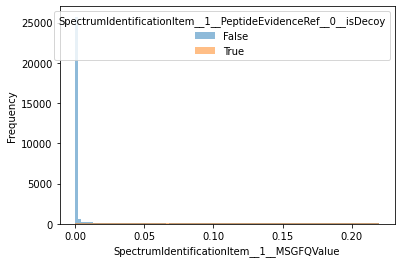

In [29]:
plot_values_by_class(df, value_col=FDR_COLUMN, class_col=IS_DECOY)

In [30]:
df[FDR_COLUMN].describe()

count    41598.000000
mean         0.039067
std          0.064612
min          0.000000
25%          0.000047
50%          0.000047
75%          0.063052
max          0.219859
Name: SpectrumIdentificationItem__1__MSGFQValue, dtype: float64

Deprecated approach: Calculating the False Discovery Rate based on the RawScore
```
# poor mens' FDR

# TODO find a way to directly achieve a specific FDR
def cutoff_decoys(df, decoy_ratio_to_keep=0.04, is_decoy_col=IS_DECOY, score_col=RAW_SCORE):
    decoys = df[df[is_decoy_col] == True]
    decoy_count = len(decoys)
    print(f"Number of Decoys: {decoy_count}")

    decoy_count_to_filter_out = decoy_count * (1-decoy_ratio_to_keep)
    decoy_count_to_filter_out = round(decoy_count_to_filter_out)
    print(f"Number of Decoys to definitely remove: {decoy_count_to_filter_out}")

    decoys_to_remove = decoys.sort_values(score_col, ascending=True).head(decoy_count_to_filter_out)
    lower_limit_score = decoys_to_remove[score_col].max()
    print(f"Lower score limit for keeping values: {lower_limit_score}")

    length_before_score_filtering = len(df)
    df = df[df[score_col] > lower_limit_score]
    length_after_score_filtering = len(df)
    print(f"Number of removed entries: {length_before_score_filtering - length_after_score_filtering}")

    fdr = df[is_decoy_col].value_counts()[True] / length_after_score_filtering
    print(f"False discovery rate (FDR): {fdr}")
    return df
```

In [31]:
def cutoff_decoys(df, fdr=0.01):
    filtered_df = df[df[FDR_COLUMN] < fdr]
    print(f"removed {len(df) - len(filtered_df)} of {len(df)} entries by filtering for FDR < {fdr}")
    return filtered_df

In [32]:
df = cutoff_decoys(df)

removed 14394 of 41598 entries by filtering for FDR < 0.01


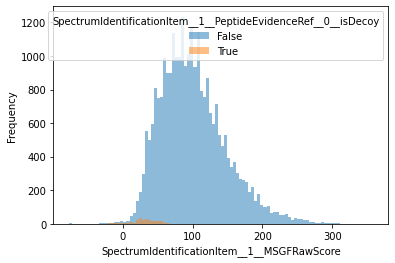

In [33]:
plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY)

In [34]:
decoy_counts = df[IS_DECOY].value_counts()
print(f"False Discovery Rate (FDR) as Decoys/Targets: {decoy_counts[True] / decoy_counts[False]}")
decoy_counts

False Discovery Rate (FDR) as Decoys/Targets: 0.009687117247522548


False    26943
True       261
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy, dtype: int64

In [35]:
# filter out Decoys
df = df[~df[IS_DECOY].astype(bool)]

In [36]:
len(df)

26943

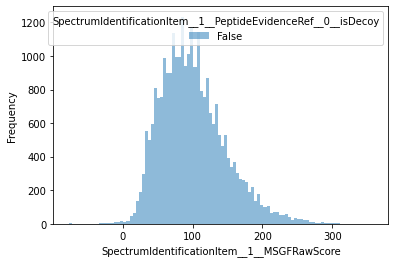

In [37]:
plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY)

## Data Enrichment

In [38]:
import wget
from openpyxl import load_workbook
import os

In [39]:
# taken from https://www.biorxiv.org/content/10.1101/428334v2.supplementary-material
SPECIES_MAPPING_FILE_DOWNLOAD_URL = 'https://www.biorxiv.org/highwire/filestream/128716/field_highwire_adjunct_files/1/428334-2.xlsx'
SPECIES_MAPPING_FILE_PATH = os.path.join(DUMP_PATH, 'file_to_species_mapping.xlsx')

In [40]:
if os.path.exists(SPECIES_MAPPING_FILE_PATH):
    print(f"skipping, because '{SPECIES_MAPPING_FILE_PATH}' already exists")
else:
    print(wget.download(SPECIES_MAPPING_FILE_DOWNLOAD_URL, out=SPECIES_MAPPING_FILE_PATH))

skipping, because '../dumps/PXD010000/file_to_species_mapping.xlsx' already exists


In [41]:
wb = load_workbook(SPECIES_MAPPING_FILE_PATH)
wb

In [42]:
wb.worksheets

[<Worksheet "mgf_list_v3">]

In [43]:
wb.worksheets[0].title

'mgf_list_v3'

In [44]:
ws = wb[wb.worksheets[0].title]
ws

<Worksheet "mgf_list_v3">

In [45]:
species_mapping_data = ws.values
species_mapping_columns = next(species_mapping_data)[0:]
species_mapping_df = pd.DataFrame(data=species_mapping_data, columns=species_mapping_columns)
species_mapping_df

,id,mgf_file,species,num_PSM,istrain
0,0,Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,6659,Train
1,1,Biodiversity_A_cryptum_FeTSB_anaerobic_2_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,8532,Train
2,2,Biodiversity_A_cryptum_FeTSB_anaerobic_3_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,7379,Train
3,3,Biodiversity_A_faecalis_LB_aerobic_01_26Feb16_Arwen_16-01-01,Alcaligenes_faecalis,15496,Train
4,4,Biodiversity_A_faecalis_LB_aerobic_02_26Feb16_Arwen_16-01-01,Alcaligenes_faecalis,15367,Train
5,5,Biodiversity_A_faecalis_LB_aerobic_03_26Feb16_Arwen_16-01-01,Alcaligenes_faecalis,15035,Train
6,6,Biodiversity_A_tumefaciens_R2A_aerobic_1_23Nov16_Pippin_16-09-11,Agrobacterium_tumefaciens_IAM_12048,12994,Train
7,7,Biodiversity_A_tumefaciens_R2A_aerobic_2_23Nov16_Pippin_16-09-11,Agrobacterium_tumefaciens_IAM_12048,12442,Train
8,8,Biodiversity_A_tumefaciens_R2A_aerobic_3_23Nov16_Pippin_16-09-11,Agrobacterium_tumefaciens_IAM_12048,11916,Train
9,9,Biodiversity_B_bifidum_CMcarb_anaerobic_01_26Feb16_Arwen_16-01-01,Bifidobacterium_bifidum_ATCC29521,14409,Train


In [46]:
del ws
del wb

In [47]:
species_mapping_df = species_mapping_df.drop(columns='id')

In [48]:
species_mapping_df = species_mapping_df.set_index('mgf_file')

In [49]:
species_mapping_df.head(1)

,species,num_PSM,istrain
mgf_file,,,
Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,6659,Train


In [50]:
df['mgf_file'] = df.mzml_filename.str.slice(stop=-5)
df.head(1)

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,mz_array,intensity_array,scanList__count,scanList__no_combination,scanList__scan__0__scan_start_time,scanList__scan__0__filter_string,scanList__scan__0__preset_scan_configuration,scanList__scan__0__ion_injection_time,scanList__scan__0__scanWindowList__count,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_lower_limit,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_upper_limit,MSn_spectrum,precursorList__count,scanList__scan__0__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__0__spectrumRef,precursorList__precursor__0__isolationWindow__isolation_window_target_mz,precursorList__precursor__0__isolationWindow__isolation_window_lower_offset,precursorList__precursor__0__isolationWindow__isolation_window_upper_offset,precursorList__precursor__0__selectedIonList__count,precursorList__precursor__0__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__0__activation__collision_energy,precursorList__precursor__0__selectedIonList__selectedIon__0__selected_ion_mz,precursorList__precursor__0__selectedIonList__selectedIon__0__charge_state,precursorList__precursor__0__selectedIonList__selectedIon__0__peak_intensity,mzml_filename,spectrumID,scan_numbers,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__FileFormat,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__DatabaseName__ID_005334_236ED22Cfasta,SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__Modification__0__name,Spectru

In [51]:
df = df.join(species_mapping_df, on='mgf_file')
df.head(1).T

,0
index,1
id,controllerType=0 controllerNumber=1 scan=2
defaultArrayLength,208
MS1_spectrum,None
ms_level,2
positive_scan,
centroid_spectrum,
base_peak_mz,129.102
base_peak_intensity,115112
total_ion_current,1.23204e+06


## Data Analysis

In [52]:
PEPTIDE_SEQUENCE = 'SpectrumIdentificationItem__1__PeptideSequence'

In [53]:
print('Off-Topic:')
duplicate_count = len(df) - len(df[PEPTIDE_SEQUENCE].unique())
print(f"Number of duplicate peptide sequences = {duplicate_count} ~ {duplicate_count / len(df)}")

Off-Topic:
Number of duplicate peptide sequences = 10598 ~ 0.39334892179786957


In [54]:
df[PEPTIDE_SEQUENCE].value_counts().describe()

count    16345.000000
mean         1.648394
std          1.804138
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         76.000000
Name: SpectrumIdentificationItem__1__PeptideSequence, dtype: float64

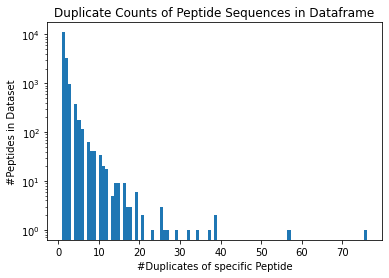

In [55]:
df[PEPTIDE_SEQUENCE].value_counts().plot.hist(
    bins=100, 
    title="Duplicate Counts of Peptide Sequences in Dataframe",
)
plt.yscale('log')
plt.xlabel("#Duplicates of specific Peptide")
plt.ylabel("#Peptides in Dataset")
plt.show()

## Incorporating Modifications

### Understanding Modifications

In [56]:
MODIFICATION_COLUMNS = [col for col in df.columns if 'Modification' in col]

In [57]:
df[
    [PEPTIDE_SEQUENCE] + MODIFICATION_COLUMNS
].dropna(subset=MODIFICATION_COLUMNS, how='all').head(10)

,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__Modification__0__name,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__name,SpectrumIdentificationItem__1__Modification__1__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__1__location,SpectrumIdentificationItem__1__Modification__1__name,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__name,SpectrumIdentificationItem__1__Modification__2__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__2__location,SpectrumIdentificationItem__1__Modification__2__name,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__2__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__2__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__2__name
0,TTTPKKPNSAMR,15.994915,11.0,Oxidation,15.994915,11.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
3,RGQVEGMESSR,15.994915,7.0,Oxidation,15.994915,7.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
5,GQVEGMESSR,15.994915,6.0,Oxidation,15.994915,6.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
11,VTENMVGHK,15.994915,5.0,Oxidation,15.994915,5.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
76,ENMPKDNVER,15.994915,3.0,Oxidation,15.994915,3.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
90,AGMGKSQEEEEKAVK,15.994915,3.0,Oxidation,15.994915,3.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
93,AGMGKSQEEEEKAVK,15.994915,3.0,Oxidation,15.994915,3.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
94,KMTGAGMMDCK,15.994915,7.0,Oxidation,15.994915,7.0,Oxidation,15.994915,8.0,Oxidation,15.994915,8.0,Oxidation,NaN,NaN,None,NaN,NaN,None
106,KMTGAGMMDCK,15.994915,7.0,Oxidation,15.994915,7.0,Oxidation,15.994915,8.0,Oxidation,15.994915,8.0,Oxidation,NaN,NaN,None,NaN,NaN,None
131,SAPMQPATTQK,15.994915,4.0,Oxidation,15.994915,4.0,Oxidation,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None


In [58]:
df.SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta.value_counts()

15.994915    2007
Name: SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta, dtype: int64

In [59]:
# it seems like 15.994915 is the only occurring modification
df[MODIFICATION_COLUMNS].describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
SpectrumIdentificationItem__1__Modification__0__location,2007.0,8.963627,7.477995e+00,1.000000,3.000000,7.000000,13.000000,47.000000
SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,2007.0,15.994915,0.000000e+00,15.994915,15.994915,15.994915,15.994915,15.994915
SpectrumIdentificationItem__1__Modification__1__location,97.0,14.371134,7.201446e+00,4.000000,9.000000,14.000000,18.000000,44.000000
SpectrumIdentificationItem__1__Modification__1__monoisotopicMassDelta,97.0,15.994915,0.000000e+00,15.994915,15.994915,15.994915,15.994915,15.994915
SpectrumIdentificationItem__1__Modification__2__location,7.0,25.857143,9.299258e+00,19.000000,20.000000,22.000000,28.000000,44.000000
SpectrumIdentificationItem__1__Modification__2__monoisotopicMassDelta,7.0,15.994915,1.918685e-15,15.994915,15.994915,15.994915,15.994915,15.994915
SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__location,2007.0,8.963627,7.477995e+00,1.000000,3.000000,7.000000,13.000000,47.000000
SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__0__monoisotopicMassDelta,2007.0,15.994915,0.000000e+00,15.994915,15.994915,15.994915,15.994915,15.994915
SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__location,97.0,14.371134,7.201446e+00,4.000000,9.000000,14.000000,18.000000,44.000000
SpectrumIdentificationItem__1__PeptideEvidenceRef__0__Modification__1__monoisotopicMassDelta,97.0,15.994915,0.000000e+00,15.994915,15.994915,15.994915,15.994915,15.994915


The modification location should usually point to M amino acid

In [60]:
# ignoring PeptideEvidenceRef modifications for now
MODIFICATION_COLUMNS = [col for col in MODIFICATION_COLUMNS if 'PeptideEvidenceRef' not in col]
MODIFICATION_COLUMNS

['SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta',
 'SpectrumIdentificationItem__1__Modification__0__location',
 'SpectrumIdentificationItem__1__Modification__0__name',
 'SpectrumIdentificationItem__1__Modification__1__monoisotopicMassDelta',
 'SpectrumIdentificationItem__1__Modification__1__location',
 'SpectrumIdentificationItem__1__Modification__1__name',
 'SpectrumIdentificationItem__1__Modification__2__monoisotopicMassDelta',
 'SpectrumIdentificationItem__1__Modification__2__location',
 'SpectrumIdentificationItem__1__Modification__2__name']

In [61]:
MODIFICATION_LOCATION_COLUMNS = [col for col in MODIFICATION_COLUMNS if col.endswith('location')]
MODIFICATION_LOCATION_COLUMNS

['SpectrumIdentificationItem__1__Modification__0__location',
 'SpectrumIdentificationItem__1__Modification__1__location',
 'SpectrumIdentificationItem__1__Modification__2__location']

In [62]:
df[
    [PEPTIDE_SEQUENCE] + MODIFICATION_LOCATION_COLUMNS    
].dropna(subset=MODIFICATION_LOCATION_COLUMNS, how='all').head(10)

,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__Modification__1__location,SpectrumIdentificationItem__1__Modification__2__location
0,TTTPKKPNSAMR,11.0,NaN,NaN
3,RGQVEGMESSR,7.0,NaN,NaN
5,GQVEGMESSR,6.0,NaN,NaN
11,VTENMVGHK,5.0,NaN,NaN
76,ENMPKDNVER,3.0,NaN,NaN
90,AGMGKSQEEEEKAVK,3.0,NaN,NaN
93,AGMGKSQEEEEKAVK,3.0,NaN,NaN
94,KMTGAGMMDCK,7.0,8.0,NaN
106,KMTGAGMMDCK,7.0,8.0,NaN
131,SAPMQPATTQK,4.0,NaN,NaN


Modification locations are 1-indexed

In [63]:
# PeptideSequence and PeptideEvidenceRef__0__PeptideSequence are always the same
df[
    df.SpectrumIdentificationItem__1__PeptideSequence != 
    df.SpectrumIdentificationItem__1__PeptideEvidenceRef__0__PeptideSequence
].head(10)

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,mz_array,intensity_array,scanList__count,scanList__no_combination,scanList__scan__0__scan_start_time,scanList__scan__0__filter_string,scanList__scan__0__preset_scan_configuration,scanList__scan__0__ion_injection_time,scanList__scan__0__scanWindowList__count,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_lower_limit,scanList__scan__0__scanWindowList__scanWindow__0__scan_window_upper_limit,MSn_spectrum,precursorList__count,scanList__scan__0__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__0__spectrumRef,precursorList__precursor__0__isolationWindow__isolation_window_target_mz,precursorList__precursor__0__isolationWindow__isolation_window_lower_offset,precursorList__precursor__0__isolationWindow__isolation_window_upper_offset,precursorList__precursor__0__selectedIonList__count,precursorList__precursor__0__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__0__activation__collision_energy,precursorList__precursor__0__selectedIonList__selectedIon__0__selected_ion_mz,precursorList__precursor__0__selectedIonList__selectedIon__0__charge_state,precursorList__precursor__0__selectedIonList__selectedIon__0__peak_intensity,mzml_filename,spectrumID,scan_numbers,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__FileFormat,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__0__DatabaseName__ID_005334_236ED22Cfasta,SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__Modification__0__name,Spectru

### Splitting Peptide Sequences into String Arrays

In [64]:
df[PEPTIDE_SEQUENCE] = df[PEPTIDE_SEQUENCE].apply(list)

### Adding Modification Annotations to Peptide Sequences

In [65]:
MODIFICATION_COLUMNS_DICTS = dict()

for col in MODIFICATION_COLUMNS:
    parts = col.split('__')
    modification = MODIFICATION_COLUMNS_DICTS.get(parts[-2], dict())
    MODIFICATION_COLUMNS_DICTS[parts[-2]] = modification
    modification[parts[-1]] = col

MODIFICATION_COLUMNS_DICTS = [column_dict for _, column_dict in sorted(MODIFICATION_COLUMNS_DICTS.items())]
MODIFICATION_COLUMNS_DICTS

[{'monoisotopicMassDelta': 'SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta',
  'location': 'SpectrumIdentificationItem__1__Modification__0__location',
  'name': 'SpectrumIdentificationItem__1__Modification__0__name'},
 {'monoisotopicMassDelta': 'SpectrumIdentificationItem__1__Modification__1__monoisotopicMassDelta',
  'location': 'SpectrumIdentificationItem__1__Modification__1__location',
  'name': 'SpectrumIdentificationItem__1__Modification__1__name'},
 {'monoisotopicMassDelta': 'SpectrumIdentificationItem__1__Modification__2__monoisotopicMassDelta',
  'location': 'SpectrumIdentificationItem__1__Modification__2__location',
  'name': 'SpectrumIdentificationItem__1__Modification__2__name'}]

In [66]:
MODIFICATION_LOCATION_SUFFIX = 'location'
MODIFICATION_NAME_SUFFIX = 'name'

In [67]:
# this is not a copy - all modifications on it are directly performed on the underlying df
modification_df = df[
    [PEPTIDE_SEQUENCE] + MODIFICATION_COLUMNS    
].dropna(subset=MODIFICATION_LOCATION_COLUMNS, how='all')

In [68]:
def modification_annotator(col: pd.Series) -> None:
    is_na = col.isna()
    for modification_columns_dict in MODIFICATION_COLUMNS_DICTS:
        if is_na[modification_columns_dict[MODIFICATION_LOCATION_SUFFIX]]:
            break
        modification_location = int(col[modification_columns_dict[MODIFICATION_LOCATION_SUFFIX]]) - 1  # 1-indexed
        modification_name = col[modification_columns_dict[MODIFICATION_NAME_SUFFIX]]
        col[PEPTIDE_SEQUENCE][modification_location] += f"({modification_name})"
    return None

modification_df.apply(func=modification_annotator, axis=1)
modification_df.head(10)

,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__0__location,SpectrumIdentificationItem__1__Modification__0__name,SpectrumIdentificationItem__1__Modification__1__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__1__location,SpectrumIdentificationItem__1__Modification__1__name,SpectrumIdentificationItem__1__Modification__2__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__2__location,SpectrumIdentificationItem__1__Modification__2__name
0,"[T, T, T, P, K, K, P, N, S, A, M(Oxidation), R]",15.994915,11.0,Oxidation,NaN,NaN,None,NaN,NaN,None
3,"[R, G, Q, V, E, G, M(Oxidation), E, S, S, R]",15.994915,7.0,Oxidation,NaN,NaN,None,NaN,NaN,None
5,"[G, Q, V, E, G, M(Oxidation), E, S, S, R]",15.994915,6.0,Oxidation,NaN,NaN,None,NaN,NaN,None
11,"[V, T, E, N, M(Oxidation), V, G, H, K]",15.994915,5.0,Oxidation,NaN,NaN,None,NaN,NaN,None
76,"[E, N, M(Oxidation), P, K, D, N, V, E, R]",15.994915,3.0,Oxidation,NaN,NaN,None,NaN,NaN,None
90,"[A, G, M(Oxidation), G, K, S, Q, E, E, E, E, K, A, V, K]",15.994915,3.0,Oxidation,NaN,NaN,None,NaN,NaN,None
93,"[A, G, M(Oxidation), G, K, S, Q, E, E, E, E, K, A, V, K]",15.994915,3.0,Oxidation,NaN,NaN,None,NaN,NaN,None
94,"[K, M, T, G, A, G, M(Oxidation), M(Oxidation), D, C, K]",15.994915,7.0,Oxidation,15.994915,8.0,Oxidation,NaN,NaN,None
106,"[K, M, T, G, A, G, M(Oxidation), M(Oxidation), D, C, K]",15.994915,7.0,Oxidation,15.994915,8.0,Oxidation,NaN,NaN,None
131,"[S, A, P, M(Oxidation), Q, P, A, T, T, Q, K]",15.994915,4.0,Oxidation,NaN,NaN,None,NaN,NaN,None


In [69]:
df[~df['SpectrumIdentificationItem__1__Modification__0__monoisotopicMassDelta'].isna()].head(2).T

,0,3
index,1,4
id,controllerType=0 controllerNumber=1 scan=2,controllerType=0 controllerNumber=1 scan=5
defaultArrayLength,208,113
MS1_spectrum,None,None
ms_level,2,2
positive_scan,,
centroid_spectrum,,
base_peak_mz,129.102,342.188
base_peak_intensity,115112,36481
total_ion_current,1.23204e+06,436166


## Data Limiting

In [70]:
TRAINING_COLUMNS = [
    PEPTIDE_SEQUENCE,
    'mz_array',
    'intensity_array',
    'species',
    'istrain'
]

In [71]:
reduced_df = df[TRAINING_COLUMNS]
reduced_df.head(1)

,SpectrumIdentificationItem__1__PeptideSequence,mz_array,intensity_array,species,istrain
0,"[T, T, T, P, K, K, P, N, S, A, M(Oxidation), R]","[100.07641, 100.087074, 101.07137, 101.1077, 102.05501, 110.07133, 110.631386, 112.05055, 112.07596, 112.08711, 113.07111, 115.05069, 115.08657, 116.07058, 127.0866, 129.10239, 130.08636, 130.09476, 130.10594, 131.0815, 131.09012, 132.54994, 136.06177, 136.07571, 139.08629, 139.90489, 140.0708, 141.06584, 141.10217, 143.08157, 145.0981, 147.11227, 147.96593, 149.02304, 152.05658, 153.10185, 155.08127, 155.11765, 157.09727, 157.10991, 158.09113, 159.07635, 164.05647, 167.05591, 167.08096, 169.05196, 171.07687, 171.11266, 175.10767, 175.11974, 176.11064, 180.07697, 181.09694, 181.13272, 185.05566, 185.09209, 186.09564, 196.10736, 197.09218, 198.08804, 199.0704, 199.10811, 203.10245, 204.10599, 205.1368, 209.1289, 212.10365, 214.11859, 222.16032, 224.10338, 226.15494, 227.1583, 238.15607, 240.13449, 240.17038, 242.11392, 257.19702, 258.15533, 258.20068, 264.13522, 265.1653, 268.12894, 283.17685, 286.13928, 300.11865, 305.15933, 305.65024, 309.192, 312.04562, 314.16446, 321.8492, 327.2031, 327.5248, 327.8595, 329.19373, 336.19986, 337.64832, 343.18893, 346.16183, 346.5337, ...]","[1044.7223, 3649.1797, 1102.0496, 1357.6985, 844.1217, 4310.1567, 701.75555, 3388.4607, 14474.438, 3396.4175, 3271.5308, 785.9828, 3989.8667, 1080.443, 8620.463, 115111.52, 60642.484, 892.7931, 6232.6123, 1503.7406, 1695.8452, 621.4343, 8136.3633, 3622.0579, 3527.2075, 690.5978, 3141.1062, 9701.572, 1072.0393, 4542.582, 913.5738, 1275.7793, 904.80707, 1183.5809, 1307.1254, 3257.456, 6890.353, 782.2476, 22261.06, 948.4679, 1374.1157, 8412.553, 1015.7166, 942.1996, 4452.6733, 818.5687, 7237.765, 11416.154, 45089.855, 7394.4355, 1465.4384, 3969.8708, 1652.0625, 1171.807, 927.53595, 48796.72, 3459.731, 1612.3837, 884.8939, 1009.1056, 948.3301, 5930.4526, 20944.246, 1297.6293, 876.90686, 699.8927, 2823.239, 4986.422, 1002.72095, 6868.054, 48777.496, 5358.242, 1159.44, 6050.066, 1177.8954, 4301.8447, 13318.132, 1678.9065, 896.4516, 1518.1096, 1104.4894, 3720.5735, 1503.6326, 7302.4346, 1507.2914, 853.93396, 1312.6992, 4806.0015, 1169.0146, 3889.657, 1483.5475, 3854.5623, 6731.8696, 3342.8206, 5410.943, 1120.8875, 888.22064, 883.156, 4437.399, 1748.3259, ...]",Bacteroides_fragilis_638R,Train


## Data Dumping

In [72]:
current_output_file_path = TRAINING_COLUMNS_DUMP_PATH + current_input_file_path[len(DATA_PATH):]
current_output_file_path

'../dumps/PXD010000/training_columns/Biodiversity_B_fragilis_01_28Jul15_Arwen_14-12-03_mzmlid.parquet'

In [73]:
#df.to_parquet(current_output_file_path)